exercice from the example at : [https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire/4507851-tp-entrainez-une-regression-logistique-et-une-svm-lineaire]()

In [12]:
import pandas as pd
raw_data = pd.read_csv('TP_2_datset_mushrooms.csv')

Ce dataset contient en colonne 1 si le champignon est veneneux

p = poison

In [13]:
raw_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
# encodage des données lettres en chiffres
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in raw_data.columns:
    raw_data[col] = labelencoder.fit_transform(raw_data[col])

raw_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [15]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
class,8124.0,0.482029,0.499708,0.0,0.0,0.0,1.0,1.0
cap-shape,8124.0,3.348104,1.604329,0.0,2.0,3.0,5.0,5.0
cap-surface,8124.0,1.827671,1.229873,0.0,0.0,2.0,3.0,3.0
cap-color,8124.0,4.504677,2.545821,0.0,3.0,4.0,8.0,9.0
bruises,8124.0,0.415559,0.492848,0.0,0.0,0.0,1.0,1.0
odor,8124.0,4.144756,2.103729,0.0,2.0,5.0,5.0,8.0
gill-attachment,8124.0,0.974151,0.158695,0.0,1.0,1.0,1.0,1.0
gill-spacing,8124.0,0.161497,0.368011,0.0,0.0,0.0,0.0,1.0
gill-size,8124.0,0.309207,0.462195,0.0,0.0,0.0,1.0,1.0
gill-color,8124.0,4.810684,3.540359,0.0,2.0,5.0,7.0,11.0


In [16]:
from sklearn.model_selection import train_test_split

# On récupère les features d'un côté...
X = raw_data.iloc[:,1:23]

# et les labels de l'autre
y = raw_data.iloc[:,0] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Classification Lineaire Logistique

On applique une regression lineaire (logistique) non régulée, qui nous servira de benchmark

In [17]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(solver = 'liblinear')

lr.fit(X_train,y_train)

# On récupère la prédiction de la valeur positive
y_prob = lr.predict_proba(X_test)[:,1] 

# On créé un vecteur de prédiction à partir du vecteur de probabilités
y_pred = np.where(y_prob > 0.5, 1, 0) 

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.981617856079836


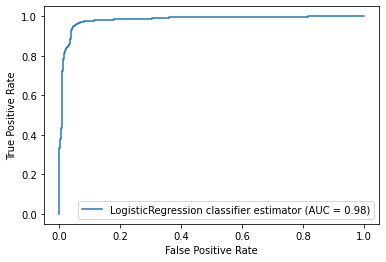

In [18]:
# affichage de la courbe roc
from sklearn import metrics
import matplotlib.pyplot as plt
display = metrics.RocCurveDisplay(fpr=false_positive_rate, tpr=true_positive_rate, roc_auc=roc_auc, estimator_name='LogisticRegression classifier estimator')
display.plot()
plt.show()

Essayons d'optimiser cette regression logistique, en testant plusieurs parametres, grace à un gridSearchCV


-> on optimise l'hyper parametre C, qui est l'inverse du parametre de regularisation $ 1 / alpha $

-> on optimise selon la norme l1 (lasso) ou l2 (ridge)

In [8]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver = 'liblinear')

params = {'C': np.logspace(-3, 3, 7) , 'penalty':['l1','l2'] }

lr_gs = GridSearchCV(lr, params, cv=10)
lr_gs.fit(X_train, y_train)

print(lr_gs.best_params_)

/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vincent/d

{'C': 1000.0, 'penalty': 'l2'}


In [9]:
# On récupère la prédiction de la valeur positive
y_prob = lr_gs.predict_proba(X_test)[:,1] 

# On créé un vecteur de prédiction à partir du vecteur de probabilités
y_pred = np.where(y_prob > 0.5, 1, 0) 

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.990036398397


# Classification SVM Lineaire

In [10]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

svm = LinearSVC()

params = { 'C': np.logspace(-3, 3, 7) }

gs_svm = GridSearchCV(svm, params, cv=10)
gs_svm.fit(X_train, y_train)

print(gs_svm.best_params_)

/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vincent/d

{'C': 0.1}


In [11]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.990036398397
